<a href="https://colab.research.google.com/github/rodrigoviannini/Machine-Learning/blob/main/Aula_9_pipeline_avan%C3%A7ado_e_outras_ferramentas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Aula 9 - pipeline avançado e outras ferramentas

Na aula de hoje, vamos explorar os seguintes tópicos em Python:

- 1) Preenchendo NaNs com o sklearn
- 2) Utilizando dados categóricos com o sklearn
- 3) Pipelines mais completas

____
____
____

In [ ]:
# importe as principais bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# desabilita os warnings
import warnings
warnings.filterwarnings('ignore')

Para a aula de hoje, vamos utilizar novamente a base de risco de crédito:

In [ ]:
df = pd.read_csv("../datasets/german_credit_data.csv", index_col=0)

df

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,49,male,1,own,little,NaN,2096,12,education,good
3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,53,male,2,free,little,little,4870,24,car,bad
...,...,...,...,...,...,...,...,...,...,...
995,31,female,1,own,little,NaN,1736,12,furniture/equipment,good
996,40,male,3,own,little,little,3857,30,car,good
997,38,male,2,own,little,NaN,804,12,radio/TV,good
998,23,male,2,free,little,little,1845,45,radio/TV,bad


In [ ]:
df.dtypes

Age                  int64
Sex                 object
Job                  int64
Housing             object
Saving accounts     object
Checking account    object
Credit amount        int64
Duration             int64
Purpose             object
Risk                object
dtype: object

In [ ]:
df.isnull().sum()

Age                   0
Sex                   0
Job                   0
Housing               0
Saving accounts     183
Checking account    394
Credit amount         0
Duration              0
Purpose               0
Risk                  0
dtype: int64

Em todas os modelos que criamos até agora, sempre nos certificamos que os dados recebidos pelos estimadores não tivessem as duas seguintes carecterísticas:

- Dados missing (NaN);
- Dados não-numéricos (str)

A esta altura, já entendemos bem o porquê disso: os estimadores dependem de algoritmos de aprendizagem, que, de uma forma ou de outra, realizam **cálculos matemáticos** no processo de aprendizagem. Sendo assim, é natural que os dados fornecidos ao estimador devem ser todos numéricos, e sem "buracos"!

Até o momento, seguimos o caminho mais simples, que é: simplesmente eliminar colunas não numéricas, e colunas/linhas que têm NaNs.

Apesar desta ser uma abordagem possível, é evidente que estamos **jogando informação fora**. Deve haver alguma forma menos drástica de resolver o problema, não é mesmo?

E é isso que aprenderemos a fazer na aula de hoje, utilizando as ferramentas do sklearn!

In [ ]:
X_cat = df.select_dtypes(exclude=np.number).drop(columns="Risk")

In [ ]:
X_cat["Housing"].value_counts()

own     713
rent    179
free    108
Name: Housing, dtype: int64

In [ ]:
X_cat["Housing"].astype("category").cat.codes

0      1
1      1
2      1
3      0
4      0
      ..
995    1
996    1
997    1
998    0
999    1
Length: 1000, dtype: int8

In [ ]:
pd.get_dummies(X_cat["Housing"])

,free,own,rent
0,0,1,0
1,0,1,0
2,0,1,0
3,1,0,0
4,1,0,0
...,...,...,...
995,0,1,0
996,0,1,0
997,0,1,0
998,1,0,0


In [ ]:
pd.get_dummies(X_cat)

,Sex_female,Sex_male,Housing_free,Housing_own,Housing_rent,Saving accounts_little,Saving accounts_moderate,Saving accounts_quite rich,Saving accounts_rich,Checking account_little,Checking account_moderate,Checking account_rich,Purpose_business,Purpose_car,Purpose_domestic appliances,Purpose_education,Purpose_furniture/equipment,Purpose_radio/TV,Purpose_repairs,Purpose_vacation/others
0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0
1,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0
2,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3,0,1,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0
4,0,1,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0
996,0,1,0,1,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0
997,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0
998,0,1,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0


In [ ]:
X_cat.isnull().sum()

Sex                   0
Housing               0
Saving accounts     183
Checking account    394
Purpose               0
dtype: int64

In [ ]:
X_cat["Saving accounts"].value_counts(dropna=False)

little        603
NaN           183
moderate      103
quite rich     63
rich           48
Name: Saving accounts, dtype: int64

In [ ]:
X_cat["Saving accounts"].fillna("unknown")

0       unknown
1        little
2        little
3        little
4        little
         ...   
995      little
996      little
997      little
998      little
999    moderate
Name: Saving accounts, Length: 1000, dtype: object

In [ ]:
X_cat["Saving accounts"].mode()

0    little
dtype: object

In [ ]:
X_cat["Saving accounts"].fillna(X_cat["Saving accounts"].mode())

0        little
1        little
2        little
3        little
4        little
         ...   
995      little
996      little
997      little
998      little
999    moderate
Name: Saving accounts, Length: 1000, dtype: object

Na prática, faremos isso com o sklearn, como uma etapa da pipeline!

_________________

Antes de avançarmos, vamos fazer o train-test split -- mas desta vez com todas as features, bem como dados missing!

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
df = pd.read_csv("../datasets/german_credit_data.csv", index_col=0)

X = df.drop(columns="Risk")
y = df["Risk"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

## 1) Preenchendo NaNs com o sklearn

No submódulo [sklearn.impute](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.impute), existem algumas classes que são utilizadas para a o preenchimento (input) de dados NaN.

Sugiro a leitura do [User Guide](https://scikit-learn.org/stable/modules/impute.html) para maiores detalhes sobre os inputers.

Vamos utilizar o [SimpleImputer](https://scikit-learn.org/stable/modules/generated/sklearn.impute.SimpleImputer.html#sklearn.impute.SimpleImputer), que preenche os dados de uma coluna a partir de estatísticas descritivas dos dados naquela coluna -- no nosso caso, as colunas com NaNs são colunas categóricas. Portanto, os NaNs serão preenchidos **com a moda** de cada coluna!

Os inputers se comportam como transformers, no que diz respeito aos métodos `.fit()` e `.transform()`. Por este motivo, aqui também é muito importante que eles **sejam fitados apenas nos dados de treino!**. 

O Pipeline irá garantir isso pra gente depois, automaticamente!

In [ ]:
df.isnull().sum()

Age                   0
Sex                   0
Job                   0
Housing               0
Saving accounts     183
Checking account    394
Credit amount         0
Duration              0
Purpose               0
Risk                  0
dtype: int64

In [ ]:
from sklearn.impute import SimpleImputer

inputer_constant = SimpleImputer(strategy="constant", fill_value="none").fit(X_train)

inputer_mode = SimpleImputer(strategy="most_frequent").fit(X_train)

In [ ]:
display(X_train["Saving accounts"].value_counts(dropna=False))

display(X_train["Checking account"].value_counts(dropna=False))

little        480
NaN           149
moderate       87
quite rich     48
rich           36
Name: Saving accounts, dtype: int64

NaN         323
little      225
moderate    201
rich         51
Name: Checking account, dtype: int64

In [ ]:
X_train_inputed_constant = pd.DataFrame(inputer_constant.transform(X_train), columns=X_train.columns)

display(X_train_inputed_constant["Saving accounts"].value_counts(dropna=False))

display(X_train_inputed_constant["Checking account"].value_counts(dropna=False))

little        480
none          149
moderate       87
quite rich     48
rich           36
Name: Saving accounts, dtype: int64

none        323
little      225
moderate    201
rich         51
Name: Checking account, dtype: int64

In [ ]:
X_train_inputed_mode = pd.DataFrame(inputer_mode.transform(X_train), columns=X_train.columns)

display(X_train_inputed_mode["Saving accounts"].value_counts(dropna=False))

display(X_train_inputed_mode["Checking account"].value_counts(dropna=False))

little        629
moderate       87
quite rich     48
rich           36
Name: Saving accounts, dtype: int64

little      548
moderate    201
rich         51
Name: Checking account, dtype: int64

Na prática, vamos **adicionar o inputer como parte do nosso Pipeline**, e, com isso, garantiremos que o data leakage não vai acontecer! ;)

Obs.: como fizemos, o sklearn irá transformar todas as colunas em dados do tipo `object`. 

Isso porque o inputer foi fitado **com todas as colunas**, o que inclui as numéricas também.

Para evitar isso, seria legal usar o inputer **apenas em colunas determinadas**. Faremos isso com a Pipeline! ;)

In [ ]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 800 entries, 675 to 695
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Age               800 non-null    int64 
 1   Sex               800 non-null    object
 2   Job               800 non-null    int64 
 3   Housing           800 non-null    object
 4   Saving accounts   651 non-null    object
 5   Checking account  477 non-null    object
 6   Credit amount     800 non-null    int64 
 7   Duration          800 non-null    int64 
 8   Purpose           800 non-null    object
dtypes: int64(4), object(5)
memory usage: 62.5+ KB


In [ ]:
X_train_inputed_mode.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Age               800 non-null    object
 1   Sex               800 non-null    object
 2   Job               800 non-null    object
 3   Housing           800 non-null    object
 4   Saving accounts   800 non-null    object
 5   Checking account  800 non-null    object
 6   Credit amount     800 non-null    object
 7   Duration          800 non-null    object
 8   Purpose           800 non-null    object
dtypes: object(9)
memory usage: 56.4+ KB


____
_____
____

## 2) Utilizando dados categóricos com o sklearn

No módulo 3, aprendemos como numerizar features categóricas usando o `pd.get_dummies()`, bem como usando o `.astype("category").cat.codes`.

Agora, com o objetivo de incluir essas estratégias de pré-processamento no pipeline, é importante que também usemos o sklearn pra fazer isso!

As classes relevantes são:

- [OneHotEncoder](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html#sklearn.preprocessing.OneHotEncoder) - faz o one-hot encoding;
- [OrdinalEncoder](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OrdinalEncoder.html#sklearn.preprocessing.OrdinalEncoder) - faz o categorical (ordinal) encoding.

Ambos os encoders também funcionam com os métodos `.fit()` e `.transform()`, então também é uma boa ideia colocá-los **como etapa inicial da Pipeline**.

Mas, para ilustrar seu funcionamento, vejamos a seguir.

In [ ]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 800 entries, 675 to 695
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Age               800 non-null    int64 
 1   Sex               800 non-null    object
 2   Job               800 non-null    int64 
 3   Housing           800 non-null    object
 4   Saving accounts   651 non-null    object
 5   Checking account  477 non-null    object
 6   Credit amount     800 non-null    int64 
 7   Duration          800 non-null    int64 
 8   Purpose           800 non-null    object
dtypes: int64(4), object(5)
memory usage: 62.5+ KB


In [ ]:
X_train_inputed_mode.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Age               800 non-null    object
 1   Sex               800 non-null    object
 2   Job               800 non-null    object
 3   Housing           800 non-null    object
 4   Saving accounts   800 non-null    object
 5   Checking account  800 non-null    object
 6   Credit amount     800 non-null    object
 7   Duration          800 non-null    object
 8   Purpose           800 non-null    object
dtypes: object(9)
memory usage: 56.4+ KB


(Primeiramente, vamos "corrigir" a codificação como object das colunas, induzida pelo inputer)

In [ ]:
"Age Job Duration".split()

['Age', 'Job', 'Duration']

In [ ]:
X_train_inputed_mode[['Age', 'Job', 'Duration', 'Credit amount']] = X_train_inputed_mode[['Age', 'Job', 'Duration', 'Credit amount']].astype(int)

In [ ]:
X_train_inputed_mode.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Age               800 non-null    int32 
 1   Sex               800 non-null    object
 2   Job               800 non-null    int32 
 3   Housing           800 non-null    object
 4   Saving accounts   800 non-null    object
 5   Checking account  800 non-null    object
 6   Credit amount     800 non-null    int32 
 7   Duration          800 non-null    int32 
 8   Purpose           800 non-null    object
dtypes: int32(4), object(5)
memory usage: 43.9+ KB


In [ ]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 800 entries, 675 to 695
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Age               800 non-null    int64 
 1   Sex               800 non-null    object
 2   Job               800 non-null    int64 
 3   Housing           800 non-null    object
 4   Saving accounts   651 non-null    object
 5   Checking account  477 non-null    object
 6   Credit amount     800 non-null    int64 
 7   Duration          800 non-null    int64 
 8   Purpose           800 non-null    object
dtypes: int64(4), object(5)
memory usage: 62.5+ KB


In [ ]:
X_train_inputed_mode.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Age               800 non-null    int32 
 1   Sex               800 non-null    object
 2   Job               800 non-null    int32 
 3   Housing           800 non-null    object
 4   Saving accounts   800 non-null    object
 5   Checking account  800 non-null    object
 6   Credit amount     800 non-null    int32 
 7   Duration          800 non-null    int32 
 8   Purpose           800 non-null    object
dtypes: int32(4), object(5)
memory usage: 43.9+ KB


Agora sim, vamos pros encoders!

In [ ]:
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder

In [ ]:
X_train_inputed_mode

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
0,26,female,3,rent,little,little,4530,30,radio/TV
1,41,male,2,own,moderate,moderate,2503,30,business
2,22,female,2,own,little,moderate,1567,12,radio/TV
3,35,male,2,own,little,moderate,3976,21,furniture/equipment
4,22,female,2,rent,moderate,little,2301,9,furniture/equipment
...,...,...,...,...,...,...,...,...,...
795,37,male,2,own,moderate,moderate,3878,24,car
796,31,male,2,own,little,moderate,1935,24,business
797,40,female,2,own,little,little,894,10,education
798,22,male,2,free,little,little,3973,14,car


In [ ]:
X_train_inputed_mode.select_dtypes(exclude=np.number)

,Sex,Housing,Saving accounts,Checking account,Purpose
0,female,rent,little,little,radio/TV
1,male,own,moderate,moderate,business
2,female,own,little,moderate,radio/TV
3,male,own,little,moderate,furniture/equipment
4,female,rent,moderate,little,furniture/equipment
...,...,...,...,...,...
795,male,own,moderate,moderate,car
796,male,own,little,moderate,business
797,female,own,little,little,education
798,male,free,little,little,car


In [ ]:
encoder_oh = OneHotEncoder().fit(X_train_inputed_mode.select_dtypes(exclude=np.number))

encoder_oe = OrdinalEncoder().fit(X_train_inputed_mode.select_dtypes(exclude=np.number))

In [ ]:
encoder_oh.transform(X_train_inputed_mode.select_dtypes(exclude=np.number)).toarray()

array([[1., 0., 0., ..., 1., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 1., 0., 0.],
       ...,
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]])

In [ ]:
pd.DataFrame(encoder_oh.transform(X_train_inputed_mode.select_dtypes(exclude=np.number)).toarray())

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
796,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
797,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
798,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
aux = pd.DataFrame(encoder_oe.transform(X_train_inputed_mode.select_dtypes(exclude=np.number)))

aux

,0,1,2,3,4
0,0.0,2.0,0.0,0.0,5.0
1,1.0,1.0,1.0,1.0,0.0
2,0.0,1.0,0.0,1.0,5.0
3,1.0,1.0,0.0,1.0,4.0
4,0.0,2.0,1.0,0.0,4.0
...,...,...,...,...,...
795,1.0,1.0,1.0,1.0,1.0
796,1.0,1.0,0.0,1.0,0.0
797,0.0,1.0,0.0,0.0,3.0
798,1.0,0.0,0.0,0.0,1.0


In [ ]:
aux[1].value_counts()

1.0    579
2.0    139
0.0     82
Name: 1, dtype: int64

In [ ]:
X_train["Housing"].value_counts()

own     579
rent    139
free     82
Name: Housing, dtype: int64

Na prática, vamos deixar esta etapa pro Pipeline também! :)

É isso que faremos agora! Vamos construir uma pipeline mais completa, que vai **incluir todos os pré-processamentos**, tratando separadamente features numéricas de features categóricas!

___________

## 3) Pipelines mais completas

Veremos agora como construir pipelines mais completas!

Pra fazer isso, vai ser muito importante que usemos também o [ColumnTransformer](https://scikit-learn.org/stable/modules/generated/sklearn.compose.ColumnTransformer.html).

Vamos ver na prática como funciona!!

In [ ]:
from sklearn.compose import ColumnTransformer

from sklearn.preprocessing import StandardScaler

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV, StratifiedKFold

from sklearn.pipeline import Pipeline

In [ ]:
df = pd.read_csv("../datasets/german_credit_data.csv", index_col=0)

X = df.drop(columns="Risk")
y = df["Risk"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# ==========================================================
# o que eu vou fazer com as features numéricas

pipe_features_num = Pipeline([("input_num", SimpleImputer(strategy="mean")),
                              ("std", StandardScaler())])

features_num = X_train.select_dtypes(include=np.number).columns.tolist()

# ==========================================================

pipe_features_cat = Pipeline([("input_cat", SimpleImputer(strategy="constant", fill_value="unknown")),
                              ("onehot", OneHotEncoder())])

features_cat = X_train.select_dtypes(exclude=np.number).columns.tolist()

# ==========================================================

pre_processador = ColumnTransformer([("transf_num", pipe_features_num, features_num),
                                     ("transf_cat", pipe_features_cat, features_cat)])

# pipeline final
pipe = Pipeline([("pre_processador", pre_processador),
                 ("dt", DecisionTreeClassifier(random_state=42))])

# ============================================

params_grid_dt = {"dt__criterion" : ["gini", "entropy"],
                  "dt__splitter" : ["best", "random"],
                  "dt__max_depth" : range(2, 11)} 

splitter = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

grid_dt = GridSearchCV(estimator=pipe,
                       param_grid=params_grid_dt,
                       scoring="f1_weighted",
                       cv=splitter,
                       verbose=10)

grid_dt.fit(X_train, y_train)

Fitting 5 folds for each of 36 candidates, totalling 180 fits
[CV 1/5; 1/36] START dt__criterion=gini, dt__max_depth=2, dt__splitter=best.....
[CV 1/5; 1/36] END dt__criterion=gini, dt__max_depth=2, dt__splitter=best;, score=0.674 total time=   0.0s
[CV 2/5; 1/36] START dt__criterion=gini, dt__max_depth=2, dt__splitter=best.....
[CV 2/5; 1/36] END dt__criterion=gini, dt__max_depth=2, dt__splitter=best;, score=0.688 total time=   0.0s
[CV 3/5; 1/36] START dt__criterion=gini, dt__max_depth=2, dt__splitter=best.....
[CV 3/5; 1/36] END dt__criterion=gini, dt__max_depth=2, dt__splitter=best;, score=0.647 total time=   0.0s
[CV 4/5; 1/36] START dt__criterion=gini, dt__max_depth=2, dt__splitter=best.....
[CV 4/5; 1/36] END dt__criterion=gini, dt__max_depth=2, dt__splitter=best;, score=0.705 total time=   0.0s
[CV 5/5; 1/36] START dt__criterion=gini, dt__max_depth=2, dt__splitter=best.....
[CV 5/5; 1/36] END dt__criterion=gini, dt__max_depth=2, dt__splitter=best;, score=0.576 total time=   0.0

[CV 2/5; 10/36] END dt__criterion=gini, dt__max_depth=6, dt__splitter=random;, score=0.703 total time=   0.0s
[CV 3/5; 10/36] START dt__criterion=gini, dt__max_depth=6, dt__splitter=random..
[CV 3/5; 10/36] END dt__criterion=gini, dt__max_depth=6, dt__splitter=random;, score=0.630 total time=   0.0s
[CV 4/5; 10/36] START dt__criterion=gini, dt__max_depth=6, dt__splitter=random..
[CV 4/5; 10/36] END dt__criterion=gini, dt__max_depth=6, dt__splitter=random;, score=0.658 total time=   0.0s
[CV 5/5; 10/36] START dt__criterion=gini, dt__max_depth=6, dt__splitter=random..
[CV 5/5; 10/36] END dt__criterion=gini, dt__max_depth=6, dt__splitter=random;, score=0.686 total time=   0.0s
[CV 1/5; 11/36] START dt__criterion=gini, dt__max_depth=7, dt__splitter=best....
[CV 1/5; 11/36] END dt__criterion=gini, dt__max_depth=7, dt__splitter=best;, score=0.693 total time=   0.0s
[CV 2/5; 11/36] START dt__criterion=gini, dt__max_depth=7, dt__splitter=best....
[CV 2/5; 11/36] END dt__criterion=gini, dt__max

[CV 5/5; 19/36] END dt__criterion=entropy, dt__max_depth=2, dt__splitter=best;, score=0.576 total time=   0.0s
[CV 1/5; 20/36] START dt__criterion=entropy, dt__max_depth=2, dt__splitter=random
[CV 1/5; 20/36] END dt__criterion=entropy, dt__max_depth=2, dt__splitter=random;, score=0.674 total time=   0.0s
[CV 2/5; 20/36] START dt__criterion=entropy, dt__max_depth=2, dt__splitter=random
[CV 2/5; 20/36] END dt__criterion=entropy, dt__max_depth=2, dt__splitter=random;, score=0.688 total time=   0.0s
[CV 3/5; 20/36] START dt__criterion=entropy, dt__max_depth=2, dt__splitter=random
[CV 3/5; 20/36] END dt__criterion=entropy, dt__max_depth=2, dt__splitter=random;, score=0.635 total time=   0.0s
[CV 4/5; 20/36] START dt__criterion=entropy, dt__max_depth=2, dt__splitter=random
[CV 4/5; 20/36] END dt__criterion=entropy, dt__max_depth=2, dt__splitter=random;, score=0.677 total time=   0.0s
[CV 5/5; 20/36] START dt__criterion=entropy, dt__max_depth=2, dt__splitter=random
[CV 5/5; 20/36] END dt__cri

[CV 1/5; 29/36] END dt__criterion=entropy, dt__max_depth=7, dt__splitter=best;, score=0.725 total time=   0.0s
[CV 2/5; 29/36] START dt__criterion=entropy, dt__max_depth=7, dt__splitter=best.
[CV 2/5; 29/36] END dt__criterion=entropy, dt__max_depth=7, dt__splitter=best;, score=0.697 total time=   0.0s
[CV 3/5; 29/36] START dt__criterion=entropy, dt__max_depth=7, dt__splitter=best.
[CV 3/5; 29/36] END dt__criterion=entropy, dt__max_depth=7, dt__splitter=best;, score=0.594 total time=   0.0s
[CV 4/5; 29/36] START dt__criterion=entropy, dt__max_depth=7, dt__splitter=best.
[CV 4/5; 29/36] END dt__criterion=entropy, dt__max_depth=7, dt__splitter=best;, score=0.678 total time=   0.0s
[CV 5/5; 29/36] START dt__criterion=entropy, dt__max_depth=7, dt__splitter=best.
[CV 5/5; 29/36] END dt__criterion=entropy, dt__max_depth=7, dt__splitter=best;, score=0.679 total time=   0.0s
[CV 1/5; 30/36] START dt__criterion=entropy, dt__max_depth=7, dt__splitter=random
[CV 1/5; 30/36] END dt__criterion=entro

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[('pre_processador',
                                        ColumnTransformer(transformers=[('transf_num',
                                                                         Pipeline(steps=[('input_num',
                                                                                          SimpleImputer()),
                                                                                         ('std',
                                                                                          StandardScaler())]),
                                                                         ['Age',
                                                                          'Job',
                                                                          'Credit '
                                                                          'amount',
                             

In [ ]:
grid_dt

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[('pre_processador',
                                        ColumnTransformer(transformers=[('transf_num',
                                                                         Pipeline(steps=[('input_num',
                                                                                          SimpleImputer()),
                                                                                         ('std',
                                                                                          StandardScaler())]),
                                                                         ['Age',
                                                                          'Job',
                                                                          'Credit '
                                                                          'amount',
                             

In [ ]:
grid_dt.best_params_

{'dt__criterion': 'entropy', 'dt__max_depth': 5, 'dt__splitter': 'random'}

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay


Métricas de avaliação de treino:
[[157  83]
 [114 446]]


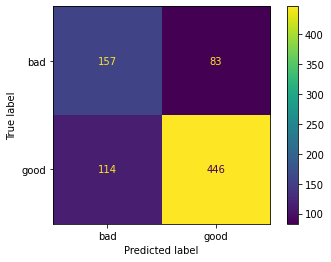

              precision    recall  f1-score   support

         bad       0.58      0.65      0.61       240
        good       0.84      0.80      0.82       560

    accuracy                           0.75       800
   macro avg       0.71      0.73      0.72       800
weighted avg       0.76      0.75      0.76       800


Métricas de avaliação de teste:
[[ 37  23]
 [ 37 103]]


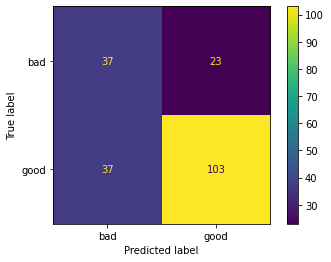

              precision    recall  f1-score   support

         bad       0.50      0.62      0.55        60
        good       0.82      0.74      0.77       140

    accuracy                           0.70       200
   macro avg       0.66      0.68      0.66       200
weighted avg       0.72      0.70      0.71       200



In [ ]:
# ============================================

print("\nMétricas de avaliação de treino:")

y_pred_train = grid_dt.predict(X_train)

print(confusion_matrix(y_train, y_pred_train))

ConfusionMatrixDisplay.from_predictions(y_train, y_pred_train)
plt.show()

print(classification_report(y_train, y_pred_train))

# ============================================

print("\nMétricas de avaliação de teste:")

y_pred_test = grid_dt.predict(X_test)

print(confusion_matrix(y_test, y_pred_test))

ConfusionMatrixDisplay.from_predictions(y_test, y_pred_test)
plt.show()

print(classification_report(y_test, y_pred_test))

_________

Uma última coisa: vamos generalizar ainda mais a pipeline!!

Pras features não-numéricas, já sabemos que podemos fazer duas codificações diferentes para numerizá-las (onehot e ordinal).

Até o momento, usamos uma abordagem ou a outra. Mas, por que não usar **ambas**?

O ColumnTransformer permite que façamos isso também!! :D

Lembrem-se que sempre utilizamo sum codificação ordinal, estamos **adicionando um viés ordinal**, que pode ser desejado ou indesejado, dependendo da feature a ser codificada!

Por isso, é importante analisar as features categóricas separadamente, e processar as colunas separadamente!

In [ ]:
X_train.select_dtypes(exclude=np.number).columns.tolist()

['Sex', 'Housing', 'Saving accounts', 'Checking account', 'Purpose']

In [ ]:
X_train["Purpose"].value_counts()

car                    267
radio/TV               225
furniture/equipment    150
business                78
education               44
repairs                 20
domestic appliances      8
vacation/others          8
Name: Purpose, dtype: int64

In [ ]:
# ==========================================================
# o que eu vou fazer com as features numéricas

pipe_features_num = Pipeline([("input_num", SimpleImputer(strategy="mean")),
                              ("std", StandardScaler())])

features_num = X_train.select_dtypes(include=np.number).columns.tolist()

# ==========================================================

pipe_features_oh = Pipeline([("input_cat_oh", SimpleImputer(fill_value="unknown")),
                             ("onehot", OneHotEncoder())])

features_oh = ['Sex', 'Purpose']

# ==========================================================

pipe_features_oe = Pipeline([("input_cat_oe", SimpleImputer(strategy="constant", fill_value="unknown")),
                             ("ordinal", OrdinalEncoder())])

features_oe = ['Housing', 'Saving accounts', 'Checking account']

# ==========================================================

pre_processador = ColumnTransformer([("transf_num", pipe_features_num, features_num),
                                     ("transf_cat_oh", pipe_features_oh, features_oh),
                                     ("transf_cat_oe", pipe_features_oe, features_oe)])

# pipeline final
pipe = Pipeline([("pre_processador", pre_processador),
                 ("dt", DecisionTreeClassifier(random_state=42))])

# ============================================

params_grid_dt = {"pre_processador__transf_cat_oh__input_cat_oh__strategy": ["constant", "most_frequent"], 
                  "dt__criterion" : ["gini", "entropy"],
                  "dt__splitter" : ["best", "random"],
                  "dt__max_depth" : range(2, 11)} 

splitter = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

grid_dt = GridSearchCV(estimator=pipe,
                       param_grid=params_grid_dt,
                       scoring="f1_weighted",
                       cv=splitter,
                       verbose=10)

grid_dt.fit(X_train, y_train)

Fitting 5 folds for each of 72 candidates, totalling 360 fits
[CV 1/5; 1/72] START dt__criterion=gini, dt__max_depth=2, dt__splitter=best, pre_processador__transf_cat_oh__input_cat_oh__strategy=constant
[CV 1/5; 1/72] END dt__criterion=gini, dt__max_depth=2, dt__splitter=best, pre_processador__transf_cat_oh__input_cat_oh__strategy=constant;, score=0.659 total time=   0.0s
[CV 2/5; 1/72] START dt__criterion=gini, dt__max_depth=2, dt__splitter=best, pre_processador__transf_cat_oh__input_cat_oh__strategy=constant
[CV 2/5; 1/72] END dt__criterion=gini, dt__max_depth=2, dt__splitter=best, pre_processador__transf_cat_oh__input_cat_oh__strategy=constant;, score=0.674 total time=   0.0s
[CV 3/5; 1/72] START dt__criterion=gini, dt__max_depth=2, dt__splitter=best, pre_processador__transf_cat_oh__input_cat_oh__strategy=constant
[CV 3/5; 1/72] END dt__criterion=gini, dt__max_depth=2, dt__splitter=best, pre_processador__transf_cat_oh__input_cat_oh__strategy=constant;, score=0.647 total time=   0.0s

[CV 4/5; 6/72] END dt__criterion=gini, dt__max_depth=3, dt__splitter=best, pre_processador__transf_cat_oh__input_cat_oh__strategy=most_frequent;, score=0.686 total time=   0.0s
[CV 5/5; 6/72] START dt__criterion=gini, dt__max_depth=3, dt__splitter=best, pre_processador__transf_cat_oh__input_cat_oh__strategy=most_frequent
[CV 5/5; 6/72] END dt__criterion=gini, dt__max_depth=3, dt__splitter=best, pre_processador__transf_cat_oh__input_cat_oh__strategy=most_frequent;, score=0.686 total time=   0.0s
[CV 1/5; 7/72] START dt__criterion=gini, dt__max_depth=3, dt__splitter=random, pre_processador__transf_cat_oh__input_cat_oh__strategy=constant
[CV 1/5; 7/72] END dt__criterion=gini, dt__max_depth=3, dt__splitter=random, pre_processador__transf_cat_oh__input_cat_oh__strategy=constant;, score=0.671 total time=   0.0s
[CV 2/5; 7/72] START dt__criterion=gini, dt__max_depth=3, dt__splitter=random, pre_processador__transf_cat_oh__input_cat_oh__strategy=constant
[CV 2/5; 7/72] END dt__criterion=gini, d

[CV 2/5; 12/72] END dt__criterion=gini, dt__max_depth=4, dt__splitter=random, pre_processador__transf_cat_oh__input_cat_oh__strategy=most_frequent;, score=0.703 total time=   0.0s
[CV 3/5; 12/72] START dt__criterion=gini, dt__max_depth=4, dt__splitter=random, pre_processador__transf_cat_oh__input_cat_oh__strategy=most_frequent
[CV 3/5; 12/72] END dt__criterion=gini, dt__max_depth=4, dt__splitter=random, pre_processador__transf_cat_oh__input_cat_oh__strategy=most_frequent;, score=0.603 total time=   0.0s
[CV 4/5; 12/72] START dt__criterion=gini, dt__max_depth=4, dt__splitter=random, pre_processador__transf_cat_oh__input_cat_oh__strategy=most_frequent
[CV 4/5; 12/72] END dt__criterion=gini, dt__max_depth=4, dt__splitter=random, pre_processador__transf_cat_oh__input_cat_oh__strategy=most_frequent;, score=0.659 total time=   0.0s
[CV 5/5; 12/72] START dt__criterion=gini, dt__max_depth=4, dt__splitter=random, pre_processador__transf_cat_oh__input_cat_oh__strategy=most_frequent
[CV 5/5; 12/7

[CV 2/5; 18/72] START dt__criterion=gini, dt__max_depth=6, dt__splitter=best, pre_processador__transf_cat_oh__input_cat_oh__strategy=most_frequent
[CV 2/5; 18/72] END dt__criterion=gini, dt__max_depth=6, dt__splitter=best, pre_processador__transf_cat_oh__input_cat_oh__strategy=most_frequent;, score=0.693 total time=   0.0s
[CV 3/5; 18/72] START dt__criterion=gini, dt__max_depth=6, dt__splitter=best, pre_processador__transf_cat_oh__input_cat_oh__strategy=most_frequent
[CV 3/5; 18/72] END dt__criterion=gini, dt__max_depth=6, dt__splitter=best, pre_processador__transf_cat_oh__input_cat_oh__strategy=most_frequent;, score=0.630 total time=   0.0s
[CV 4/5; 18/72] START dt__criterion=gini, dt__max_depth=6, dt__splitter=best, pre_processador__transf_cat_oh__input_cat_oh__strategy=most_frequent
[CV 4/5; 18/72] END dt__criterion=gini, dt__max_depth=6, dt__splitter=best, pre_processador__transf_cat_oh__input_cat_oh__strategy=most_frequent;, score=0.668 total time=   0.0s
[CV 5/5; 18/72] START dt_

[CV 3/5; 23/72] END dt__criterion=gini, dt__max_depth=7, dt__splitter=random, pre_processador__transf_cat_oh__input_cat_oh__strategy=constant;, score=0.587 total time=   0.0s
[CV 4/5; 23/72] START dt__criterion=gini, dt__max_depth=7, dt__splitter=random, pre_processador__transf_cat_oh__input_cat_oh__strategy=constant
[CV 4/5; 23/72] END dt__criterion=gini, dt__max_depth=7, dt__splitter=random, pre_processador__transf_cat_oh__input_cat_oh__strategy=constant;, score=0.711 total time=   0.0s
[CV 5/5; 23/72] START dt__criterion=gini, dt__max_depth=7, dt__splitter=random, pre_processador__transf_cat_oh__input_cat_oh__strategy=constant
[CV 5/5; 23/72] END dt__criterion=gini, dt__max_depth=7, dt__splitter=random, pre_processador__transf_cat_oh__input_cat_oh__strategy=constant;, score=0.636 total time=   0.0s
[CV 1/5; 24/72] START dt__criterion=gini, dt__max_depth=7, dt__splitter=random, pre_processador__transf_cat_oh__input_cat_oh__strategy=most_frequent
[CV 1/5; 24/72] END dt__criterion=gini

[CV 2/5; 29/72] END dt__criterion=gini, dt__max_depth=9, dt__splitter=best, pre_processador__transf_cat_oh__input_cat_oh__strategy=constant;, score=0.730 total time=   0.0s
[CV 3/5; 29/72] START dt__criterion=gini, dt__max_depth=9, dt__splitter=best, pre_processador__transf_cat_oh__input_cat_oh__strategy=constant
[CV 3/5; 29/72] END dt__criterion=gini, dt__max_depth=9, dt__splitter=best, pre_processador__transf_cat_oh__input_cat_oh__strategy=constant;, score=0.637 total time=   0.0s
[CV 4/5; 29/72] START dt__criterion=gini, dt__max_depth=9, dt__splitter=best, pre_processador__transf_cat_oh__input_cat_oh__strategy=constant
[CV 4/5; 29/72] END dt__criterion=gini, dt__max_depth=9, dt__splitter=best, pre_processador__transf_cat_oh__input_cat_oh__strategy=constant;, score=0.697 total time=   0.0s
[CV 5/5; 29/72] START dt__criterion=gini, dt__max_depth=9, dt__splitter=best, pre_processador__transf_cat_oh__input_cat_oh__strategy=constant
[CV 5/5; 29/72] END dt__criterion=gini, dt__max_depth=9

[CV 4/5; 34/72] END dt__criterion=gini, dt__max_depth=10, dt__splitter=best, pre_processador__transf_cat_oh__input_cat_oh__strategy=most_frequent;, score=0.678 total time=   0.0s
[CV 5/5; 34/72] START dt__criterion=gini, dt__max_depth=10, dt__splitter=best, pre_processador__transf_cat_oh__input_cat_oh__strategy=most_frequent
[CV 5/5; 34/72] END dt__criterion=gini, dt__max_depth=10, dt__splitter=best, pre_processador__transf_cat_oh__input_cat_oh__strategy=most_frequent;, score=0.659 total time=   0.0s
[CV 1/5; 35/72] START dt__criterion=gini, dt__max_depth=10, dt__splitter=random, pre_processador__transf_cat_oh__input_cat_oh__strategy=constant
[CV 1/5; 35/72] END dt__criterion=gini, dt__max_depth=10, dt__splitter=random, pre_processador__transf_cat_oh__input_cat_oh__strategy=constant;, score=0.672 total time=   0.0s
[CV 2/5; 35/72] START dt__criterion=gini, dt__max_depth=10, dt__splitter=random, pre_processador__transf_cat_oh__input_cat_oh__strategy=constant
[CV 2/5; 35/72] END dt__crit

[CV 5/5; 39/72] END dt__criterion=entropy, dt__max_depth=2, dt__splitter=random, pre_processador__transf_cat_oh__input_cat_oh__strategy=constant;, score=0.614 total time=   0.1s
[CV 1/5; 40/72] START dt__criterion=entropy, dt__max_depth=2, dt__splitter=random, pre_processador__transf_cat_oh__input_cat_oh__strategy=most_frequent
[CV 1/5; 40/72] END dt__criterion=entropy, dt__max_depth=2, dt__splitter=random, pre_processador__transf_cat_oh__input_cat_oh__strategy=most_frequent;, score=0.588 total time=   0.0s
[CV 2/5; 40/72] START dt__criterion=entropy, dt__max_depth=2, dt__splitter=random, pre_processador__transf_cat_oh__input_cat_oh__strategy=most_frequent
[CV 2/5; 40/72] END dt__criterion=entropy, dt__max_depth=2, dt__splitter=random, pre_processador__transf_cat_oh__input_cat_oh__strategy=most_frequent;, score=0.666 total time=   0.0s
[CV 3/5; 40/72] START dt__criterion=entropy, dt__max_depth=2, dt__splitter=random, pre_processador__transf_cat_oh__input_cat_oh__strategy=most_frequent


[CV 1/5; 45/72] START dt__criterion=entropy, dt__max_depth=4, dt__splitter=best, pre_processador__transf_cat_oh__input_cat_oh__strategy=constant
[CV 1/5; 45/72] END dt__criterion=entropy, dt__max_depth=4, dt__splitter=best, pre_processador__transf_cat_oh__input_cat_oh__strategy=constant;, score=0.674 total time=   0.0s
[CV 2/5; 45/72] START dt__criterion=entropy, dt__max_depth=4, dt__splitter=best, pre_processador__transf_cat_oh__input_cat_oh__strategy=constant
[CV 2/5; 45/72] END dt__criterion=entropy, dt__max_depth=4, dt__splitter=best, pre_processador__transf_cat_oh__input_cat_oh__strategy=constant;, score=0.674 total time=   0.0s
[CV 3/5; 45/72] START dt__criterion=entropy, dt__max_depth=4, dt__splitter=best, pre_processador__transf_cat_oh__input_cat_oh__strategy=constant
[CV 3/5; 45/72] END dt__criterion=entropy, dt__max_depth=4, dt__splitter=best, pre_processador__transf_cat_oh__input_cat_oh__strategy=constant;, score=0.679 total time=   0.0s
[CV 4/5; 45/72] START dt__criterion=e

[CV 3/5; 50/72] END dt__criterion=entropy, dt__max_depth=5, dt__splitter=best, pre_processador__transf_cat_oh__input_cat_oh__strategy=most_frequent;, score=0.637 total time=   0.0s
[CV 4/5; 50/72] START dt__criterion=entropy, dt__max_depth=5, dt__splitter=best, pre_processador__transf_cat_oh__input_cat_oh__strategy=most_frequent
[CV 4/5; 50/72] END dt__criterion=entropy, dt__max_depth=5, dt__splitter=best, pre_processador__transf_cat_oh__input_cat_oh__strategy=most_frequent;, score=0.730 total time=   0.0s
[CV 5/5; 50/72] START dt__criterion=entropy, dt__max_depth=5, dt__splitter=best, pre_processador__transf_cat_oh__input_cat_oh__strategy=most_frequent
[CV 5/5; 50/72] END dt__criterion=entropy, dt__max_depth=5, dt__splitter=best, pre_processador__transf_cat_oh__input_cat_oh__strategy=most_frequent;, score=0.683 total time=   0.0s
[CV 1/5; 51/72] START dt__criterion=entropy, dt__max_depth=5, dt__splitter=random, pre_processador__transf_cat_oh__input_cat_oh__strategy=constant
[CV 1/5; 5

[CV 4/5; 55/72] END dt__criterion=entropy, dt__max_depth=6, dt__splitter=random, pre_processador__transf_cat_oh__input_cat_oh__strategy=constant;, score=0.702 total time=   0.0s
[CV 5/5; 55/72] START dt__criterion=entropy, dt__max_depth=6, dt__splitter=random, pre_processador__transf_cat_oh__input_cat_oh__strategy=constant
[CV 5/5; 55/72] END dt__criterion=entropy, dt__max_depth=6, dt__splitter=random, pre_processador__transf_cat_oh__input_cat_oh__strategy=constant;, score=0.733 total time=   0.0s
[CV 1/5; 56/72] START dt__criterion=entropy, dt__max_depth=6, dt__splitter=random, pre_processador__transf_cat_oh__input_cat_oh__strategy=most_frequent
[CV 1/5; 56/72] END dt__criterion=entropy, dt__max_depth=6, dt__splitter=random, pre_processador__transf_cat_oh__input_cat_oh__strategy=most_frequent;, score=0.667 total time=   0.0s
[CV 2/5; 56/72] START dt__criterion=entropy, dt__max_depth=6, dt__splitter=random, pre_processador__transf_cat_oh__input_cat_oh__strategy=most_frequent
[CV 2/5; 5

[CV 4/5; 60/72] END dt__criterion=entropy, dt__max_depth=7, dt__splitter=random, pre_processador__transf_cat_oh__input_cat_oh__strategy=most_frequent;, score=0.689 total time=   0.0s
[CV 5/5; 60/72] START dt__criterion=entropy, dt__max_depth=7, dt__splitter=random, pre_processador__transf_cat_oh__input_cat_oh__strategy=most_frequent
[CV 5/5; 60/72] END dt__criterion=entropy, dt__max_depth=7, dt__splitter=random, pre_processador__transf_cat_oh__input_cat_oh__strategy=most_frequent;, score=0.646 total time=   0.0s
[CV 1/5; 61/72] START dt__criterion=entropy, dt__max_depth=8, dt__splitter=best, pre_processador__transf_cat_oh__input_cat_oh__strategy=constant
[CV 1/5; 61/72] END dt__criterion=entropy, dt__max_depth=8, dt__splitter=best, pre_processador__transf_cat_oh__input_cat_oh__strategy=constant;, score=0.656 total time=   0.0s
[CV 2/5; 61/72] START dt__criterion=entropy, dt__max_depth=8, dt__splitter=best, pre_processador__transf_cat_oh__input_cat_oh__strategy=constant
[CV 2/5; 61/72] 

[CV 1/5; 66/72] END dt__criterion=entropy, dt__max_depth=9, dt__splitter=best, pre_processador__transf_cat_oh__input_cat_oh__strategy=most_frequent;, score=0.640 total time=   0.0s
[CV 2/5; 66/72] START dt__criterion=entropy, dt__max_depth=9, dt__splitter=best, pre_processador__transf_cat_oh__input_cat_oh__strategy=most_frequent
[CV 2/5; 66/72] END dt__criterion=entropy, dt__max_depth=9, dt__splitter=best, pre_processador__transf_cat_oh__input_cat_oh__strategy=most_frequent;, score=0.713 total time=   0.0s
[CV 3/5; 66/72] START dt__criterion=entropy, dt__max_depth=9, dt__splitter=best, pre_processador__transf_cat_oh__input_cat_oh__strategy=most_frequent
[CV 3/5; 66/72] END dt__criterion=entropy, dt__max_depth=9, dt__splitter=best, pre_processador__transf_cat_oh__input_cat_oh__strategy=most_frequent;, score=0.599 total time=   0.0s
[CV 4/5; 66/72] START dt__criterion=entropy, dt__max_depth=9, dt__splitter=best, pre_processador__transf_cat_oh__input_cat_oh__strategy=most_frequent
[CV 4/5

[CV 3/5; 71/72] END dt__criterion=entropy, dt__max_depth=10, dt__splitter=random, pre_processador__transf_cat_oh__input_cat_oh__strategy=constant;, score=0.657 total time=   0.0s
[CV 4/5; 71/72] START dt__criterion=entropy, dt__max_depth=10, dt__splitter=random, pre_processador__transf_cat_oh__input_cat_oh__strategy=constant
[CV 4/5; 71/72] END dt__criterion=entropy, dt__max_depth=10, dt__splitter=random, pre_processador__transf_cat_oh__input_cat_oh__strategy=constant;, score=0.707 total time=   0.0s
[CV 5/5; 71/72] START dt__criterion=entropy, dt__max_depth=10, dt__splitter=random, pre_processador__transf_cat_oh__input_cat_oh__strategy=constant
[CV 5/5; 71/72] END dt__criterion=entropy, dt__max_depth=10, dt__splitter=random, pre_processador__transf_cat_oh__input_cat_oh__strategy=constant;, score=0.648 total time=   0.0s
[CV 1/5; 72/72] START dt__criterion=entropy, dt__max_depth=10, dt__splitter=random, pre_processador__transf_cat_oh__input_cat_oh__strategy=most_frequent
[CV 1/5; 72/72

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[('pre_processador',
                                        ColumnTransformer(transformers=[('transf_num',
                                                                         Pipeline(steps=[('input_num',
                                                                                          SimpleImputer()),
                                                                                         ('std',
                                                                                          StandardScaler())]),
                                                                         ['Age',
                                                                          'Job',
                                                                          'Credit '
                                                                          'amount',
                             

In [ ]:
grid_dt.best_params_

{'dt__criterion': 'entropy',
 'dt__max_depth': 6,
 'dt__splitter': 'random',
 'pre_processador__transf_cat_oh__input_cat_oh__strategy': 'constant'}


Métricas de avaliação de treino:
[[ 86 154]
 [ 18 542]]


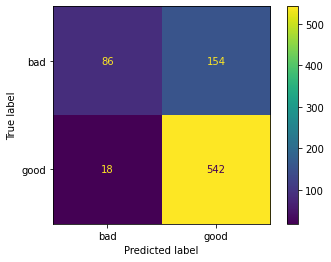

              precision    recall  f1-score   support

         bad       0.83      0.36      0.50       240
        good       0.78      0.97      0.86       560

    accuracy                           0.79       800
   macro avg       0.80      0.66      0.68       800
weighted avg       0.79      0.79      0.75       800


Métricas de avaliação de teste:
[[ 14  46]
 [ 14 126]]


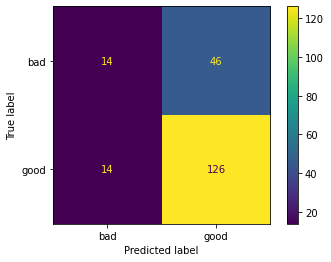

              precision    recall  f1-score   support

         bad       0.50      0.23      0.32        60
        good       0.73      0.90      0.81       140

    accuracy                           0.70       200
   macro avg       0.62      0.57      0.56       200
weighted avg       0.66      0.70      0.66       200



In [ ]:
# ============================================

print("\nMétricas de avaliação de treino:")

y_pred_train = grid_dt.predict(X_train)

print(confusion_matrix(y_train, y_pred_train))

ConfusionMatrixDisplay.from_predictions(y_train, y_pred_train)
plt.show()

print(classification_report(y_train, y_pred_train))

# ============================================

print("\nMétricas de avaliação de teste:")

y_pred_test = grid_dt.predict(X_test)

print(confusion_matrix(y_test, y_pred_test))

ConfusionMatrixDisplay.from_predictions(y_test, y_pred_test)
plt.show()

print(classification_report(y_test, y_pred_test))

__________

Agora sim, ganhamos um poder enorme! 

Com o pipeline mais genérico que acabamos de conhecer, agora somos capazes de criar modelos que se utilizam de toda a informação disponível, e de maneiras diferentes! Muito legal, não é mesmo? 

Aproveite estas novas ferramentas incríveis que estão à sua disposição! Explore suas aplicações, e pratique muito!